# Aufgabe 6 Cross Validation und Grid Search

## (1) ein Datensatz für die Klassifikationsaufgabe

Ich habe einen Datensatz von Commeo and Osmancik Rice Dataset ( siehe https://www.muratkoklu.com/datasets/ ) gesucht. Für die beiden Arten wurden insgesamt 3810 Bilder von Reiskörnern aufgenommen, verarbeitet und Rückschlüsse auf Merkmale gezogen. Für jedes Reiskorn wurden 7 morphologische Merkmale erhalten.

In [1]:
# import all the important basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import Parallel

In [2]:
# import data

rice_df = pd.read_excel ('../dataset/Rice_Cammeo_Osmancik.xlsx')

Die Beschreibung des Datensatzes lautet wie folgt:

In [3]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [4]:
rice_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


## (2) Unter verschiedenen Algorithmen und Hyperparameter das "beste" Modell zu finden

In [5]:
# orignial Daten preprocessing
# Training Set and Testing Set spliting

X, y = rice_df.drop(columns = 'Class'), rice_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### (a) Modell 1: Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

LogistReg_clf = LogisticRegression().fit(X_train, y_train)
LogistReg_clf.score(X_test, y_test)

0.9291338582677166

Logistic Regression mit dem Anpassen der Hyperparameter eines Schätzers

In [7]:
gridsearch_LogistReg = GridSearchCV(estimator = LogisticRegression(), param_grid = {'C': [1, 5], 'random_state': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_LogistReg.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_LogistReg.best_score_))
print("The score on test dataset is: {}".format(gridsearch_LogistReg.score(X_test, y_test)))

Best Estimator is: LogisticRegression(C=1, random_state=1)
Best score on train dataset is: 0.9294608199413175
The score on test dataset is: 0.9291338582677166


### (b) Modell 2: Ridge Classifier

In [8]:
from sklearn.linear_model import RidgeClassifier

Ridge_clf = RidgeClassifier().fit(X_train, y_train)
Ridge_clf.score(X_test, y_test)

0.931758530183727

Ridge Classifier mit dem Anpassen der Hyperparameter eines Schätzers

In [9]:
gridsearch_Ridge = GridSearchCV(estimator = RidgeClassifier(), param_grid = {'alpha': [1, 5], 'random_state': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_LogistReg.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_LogistReg.best_score_))
print("The score on test dataset is: {}".format(gridsearch_LogistReg.score(X_test, y_test)))

Best Estimator is: LogisticRegression(C=1, random_state=1)
Best score on train dataset is: 0.9294608199413175
The score on test dataset is: 0.9291338582677166


### (c) Modell 3: benutzen Gradient Decent zur Verbesserung (rule update)

In [10]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier().fit(X_train, y_train)
SGD_clf.score(X_test, y_test)

0.5984251968503937

SGDClassifier mit dem Anpassen der Hyperparameter eines Schätzers

In [11]:
gridsearch_SGD = GridSearchCV(estimator = SGDClassifier(), 
                              param_grid = {'alpha': [1, 10], 'max_iter': [100, 10000], 'early_stopping': [True], 'random_state': [1, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_SGD.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_SGD.best_score_))
print("The score on test dataset is: {}".format(gridsearch_SGD.score(X_test, y_test)))

Best Estimator is: SGDClassifier(alpha=1, early_stopping=True, max_iter=100, random_state=1)
Best score on train dataset is: 0.5144736062881907
The score on test dataset is: 0.5721784776902887


### (d) Modell 4: Support Vector Machines, SVM

hard SVM

In [12]:
from sklearn import svm

svm_clf = svm.SVC().fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.8713910761154856

soft SVM

In [13]:
svm_rbf_clf = svm.SVC(kernel = 'rbf', probability = True).fit(X_train, y_train)
svm_rbf_clf.score(X_test, y_test)

0.8713910761154856

SVM mit dem Anpassen der Hyperparameter eines Schätzers 

In [14]:
gridsearch_svm = GridSearchCV(
    estimator = svm.SVC(), param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'degree': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_svm.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_svm.best_score_))
print("The score on test dataset is: {}".format(gridsearch_svm.score(X_test, y_test)))

Best Estimator is: SVC(C=1, degree=1, kernel='linear')
Best score on train dataset is: 0.9301165576462355
The score on test dataset is: 0.9343832020997376


In [15]:
gridsearch_svm.cv_results_

{'mean_fit_time': array([1.6527082 , 0.0819098 , 0.05924244, 0.18125172, 1.63779645,
        0.08267946, 0.06087146, 0.17754536, 1.31502881, 0.08123279,
        0.0570107 , 0.17978249, 1.31449819, 0.0822381 , 0.08169861,
        0.17992792]),
 'std_fit_time': array([6.56900493e-01, 6.66541779e-04, 1.58620281e-03, 1.85192653e-03,
        6.49693181e-01, 6.28378829e-04, 1.03111195e-03, 1.08512375e-03,
        2.78833498e-01, 8.38880424e-04, 1.34527169e-03, 3.54969219e-03,
        3.10189385e-01, 1.72445571e-03, 6.25213422e-03, 2.54689855e-03]),
 'mean_score_time': array([0.00601163, 0.05019417, 0.01276464, 0.04022503, 0.00599303,
        0.05058413, 0.01164956, 0.0403986 , 0.00607038, 0.04684954,
        0.01211658, 0.04026532, 0.00611458, 0.04725776, 0.01204395,
        0.04177365]),
 'std_score_time': array([0.00037073, 0.00095917, 0.00013144, 0.00035464, 0.00011786,
        0.00085535, 0.0004267 , 0.00020237, 0.00019503, 0.00075573,
        0.00034823, 0.00080292, 0.00011906, 0.001759

### (e) Modell 5: k-Nearest Neighbor

In [16]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier().fit(X_train, y_train)
neigh_clf.score(X_test, y_test)

0.868766404199475

KNeighborsClassifier  mit dem Anpassen der Hyperparameter eines Schätzers

In [17]:
gridsearch_neigh = GridSearchCV(estimator = KNeighborsClassifier(), 
                                param_grid = {'n_neighbors': [1, 10], 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size': [1, 50]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_neigh.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_neigh.best_score_))
print("The score on test dataset is: {}".format(gridsearch_neigh.score(X_test, y_test)))

Best Estimator is: KNeighborsClassifier(leaf_size=1, n_neighbors=10)
Best score on train dataset is: 0.8838595924520176
The score on test dataset is: 0.863517060367454


### (f) Modell 6: Decision Tree

In [18]:
from sklearn import tree

DT_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
DT_clf.score(X_test, y_test)

0.9041994750656168

Decision Tree mit dem Anpassen der Hyperparameter eines Schätzers

In [19]:
gridsearch_DT = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(), 
    param_grid = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [1, 50], 'min_samples_leaf': [1, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_DT.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_DT.best_score_))
print("The score on test dataset is: {}".format(gridsearch_DT.score(X_test, y_test)))

Best Estimator is: DecisionTreeClassifier(max_depth=1)
Best score on train dataset is: 0.9251952946243506
The score on test dataset is: 0.9225721784776902


### (g) Bayesian Classification

#### Modell 7 Naive Bayes classifier for multivariate Bernoulli models

In [20]:
from sklearn.naive_bayes import BernoulliNB

Bernoulli_clf = BernoulliNB().fit(X_train, y_train)
Bernoulli_clf.score(X_test, y_test)

0.5721784776902887

In [21]:
gridsearch_Bernoulli = GridSearchCV(estimator = BernoulliNB(), param_grid = {'alpha': [1, 2], 'fit_prior': [False]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Bernoulli.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Bernoulli.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Bernoulli.score(X_test, y_test)))

Best Estimator is: BernoulliNB(alpha=1, fit_prior=False)
Best score on train dataset is: 0.5721785243209776
The score on test dataset is: 0.5721784776902887


#### Modell 8 Naive Bayes classifier for categorical features

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

enc = OrdinalEncoder()

x_train = enc.fit(X_train).fit_transform(X_train)
x_test = enc.fit(X_test).fit_transform(X_test)

Categ_clf = CategoricalNB().fit(x_train, y_train)
Categ_clf.score(x_test, y_test)

0.573490813648294

#### Modell 9 Gaussian Naive Bayes algorithm for classification

In [23]:
from sklearn.naive_bayes import GaussianNB

Gaussian_clf = GaussianNB().fit(X_train, y_train)
Gaussian_clf.score(X_test, y_test)

0.9041994750656168

In [24]:
gridsearch_Gaussian = GridSearchCV(estimator = GaussianNB(), param_grid = {'var_smoothing': [0, 1]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Gaussian.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Gaussian.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Gaussian.score(X_test, y_test)))

Best Estimator is: GaussianNB(var_smoothing=0)
Best score on train dataset is: 0.9173210584403348
The score on test dataset is: 0.9173228346456693


#### Modell 10 Naive Bayes classifier for multinomial models

In [25]:
from sklearn.naive_bayes import MultinomialNB

Multi_Gaussian_clf = MultinomialNB().fit(X_train, y_train)
Multi_Gaussian_clf.score(X_test, y_test)

0.8438320209973753

In [26]:
gridsearch_Multi_Gaussian = GridSearchCV(estimator = MultinomialNB(), param_grid = {'alpha': [0.001, 2]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Multi_Gaussian.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Multi_Gaussian.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Multi_Gaussian.score(X_test, y_test)))

Best Estimator is: MultinomialNB(alpha=0.001)
Best score on train dataset is: 0.853016231930873
The score on test dataset is: 0.8438320209973753


### (h) Modell 11: Neural Networks

In [27]:
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier().fit(X_train, y_train)
MLP_clf.score(X_test, y_test)

0.5196850393700787

In [29]:
import warnings
warnings.filterwarnings("ignore")

gridsearch_MLP = GridSearchCV(
    estimator = MLPClassifier(), 
    param_grid = {'hidden_layer_sizes': [1, 20], 'random_state': [1, 10], 'max_iter': [1000, 10000], 
                  'activation': ('identity', 'logistic', 'relu', 'tanh'), 
                  'alpha': [0.0001, 1], 'learning_rate': ('constant', 'invscaling', 'adaptive')}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_MLP.best_estimator_))
print("Best Parameter is: {}".format(gridsearch_MLP.best_params_))
print("Best score on train dataset is: {}".format(gridsearch_MLP.best_score_))
print("The score on test dataset is: {}".format(gridsearch_MLP.score(X_test, y_test)))

Best Estimator is: MLPClassifier(hidden_layer_sizes=20, max_iter=1000, random_state=1)
Best Parameter is: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 1}
Best score on train dataset is: 0.7775014132278122
The score on test dataset is: 0.45013123359580054


### (i) Ensemble methods

#### Modell 12: Bagging meta-estimator

In [30]:
from sklearn.ensemble import BaggingClassifier

Bag_clf = BaggingClassifier(base_estimator = svm.SVC(), n_estimators=10, random_state = 0).fit(X_train, y_train)
Bag_clf.score(X_test, y_test)

0.868766404199475

 #### Modell 13: Forests of randomized trees

In [31]:
from sklearn.ensemble import RandomForestClassifier

randForest_clf= RandomForestClassifier().fit(X_train, y_train)
randForest_clf.score(X_test, y_test)

0.9186351706036745

In [32]:
gridsearch_randForest = GridSearchCV(estimator = RandomForestClassifier(), 
                                     param_grid = {'max_depth': [1, 10], 'n_estimators': [3, 200], 'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_randForest.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_randForest.best_score_))
print("The score on test dataset is: {}".format(gridsearch_randForest.score(X_test, y_test)))

Best Estimator is: RandomForestClassifier(max_depth=1, n_estimators=3, random_state=10)
Best score on train dataset is: 0.9268351772591457
The score on test dataset is: 0.9291338582677166


#### Modell 14: Boosting - AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_clf = AdaBoostClassifier()

gridsearch_AdaBoost = GridSearchCV(estimator = AdaBoostClassifier(), 
                                     param_grid = {'n_estimators': [3, 200], 'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_AdaBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_AdaBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_AdaBoost.score(X_test, y_test)))

Best Estimator is: AdaBoostClassifier(n_estimators=3, random_state=0)
Best score on train dataset is: 0.9251952946243506
The score on test dataset is: 0.9225721784776902


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

GraBoost_clf = GradientBoostingClassifier()

gridsearch_GraBoost = GridSearchCV(
    estimator = AdaBoostClassifier(), 
    param_grid = {'n_estimators': [3, 200], 'learning_rate': [0.1, 1.0], 'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_GraBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_GraBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_GraBoost.score(X_test, y_test)))

Best Estimator is: AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)
Best score on train dataset is: 0.9274909149640637
The score on test dataset is: 0.9238845144356955


In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier

HistGraBoost_clf = HistGradientBoostingClassifier()

gridsearch_HistGraBoost = GridSearchCV(
    estimator = HistGradientBoostingClassifier(), 
    param_grid = {'max_iter': [3, 200], 'learning_rate': [0.1, 1.0], 'max_bins': [100, 255], 'max_leaf_nodes': [20, 50]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_HistGraBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_HistGraBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_HistGraBoost.score(X_test, y_test)))

Best Estimator is: HistGradientBoostingClassifier(max_iter=200, max_leaf_nodes=20)
Best score on train dataset is: 0.9160101214029988
The score on test dataset is: 0.9212598425196851


#### Modell 15.1 Voting Classifier - hard

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

vot_hard_clf = VotingClassifier(estimators = [('rf', randForest_clf), ('lr', LogistReg_clf)], voting = 'hard')

for clf, label in zip([randForest_clf, LogistReg_clf, vot_hard_clf], ['Random Forest', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 8)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.89 (+/- 0.02) [Random Forest]
Accuracy: 0.93 (+/- 0.02) [Logistic Regression]
Accuracy: 0.92 (+/- 0.01) [Ensemble]


#### Modell 15.2: Voting Classifier - soft

In [40]:
# Training classifiers

vot_soft_clf = VotingClassifier(estimators = [('dt', DT_clf), ('svc', svm_rbf_clf)], voting = 'soft', weights = [3, 5])

for clf, label in zip([DT_clf, svm_rbf_clf, vot_soft_clf], ['Decision Tree', 'Soft SVM', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.89 (+/- 0.02) [Decision Tree]
Accuracy: 0.88 (+/- 0.03) [Soft SVM]
Accuracy: 0.90 (+/- 0.02) [Ensemble]


## (3) Zielmetrik auswählen

Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Receiver Operating Characteristics (ROC) Curves, which can make a tradeoff between hit rate (TP) and false alarm (FP) over nosiy channels.
Area under the Curve (AUC) can be used to measure the quality of an Algorithm.

ROC kann einen Kompromiss zwischen Trefferrate (TP) und Fehlalarm (FP) über verrauschte Kanäle eingehen.
AUC kann verwendet werden, um die Qualität eines Algorithmus zu messen

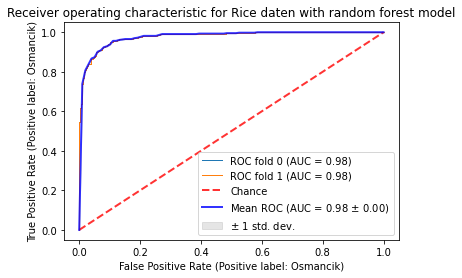

In [38]:
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 2)
classifier = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name = "ROC fold {}".format(i),
        lw = 1,
        ax = ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic for Rice daten with random forest model",
)
ax.legend(loc = "lower right")
plt.show()

## (4) Plotten

eine Kurve mit der Suchzeit, in Abhängigkeit von der Anzahl an CPU-Kernen.

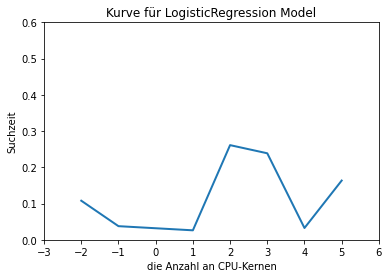

In [173]:
clf1 = GridSearchCV(estimator = LogisticRegression(), param_grid = {'n_jobs': [-2, -1, 1, 2, 3, 4, 5]}, cv = 6).fit(X_train, y_train)
results1 = pd.DataFrame(clf1.cv_results_)
fig, ax = plt.subplots()
ax.plot(results1.param_n_jobs, results1.mean_fit_time, linewidth = 2.0)
plt.title('Kurve für LogisticRegression Model')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim=(0, 0.6))
plt.show()

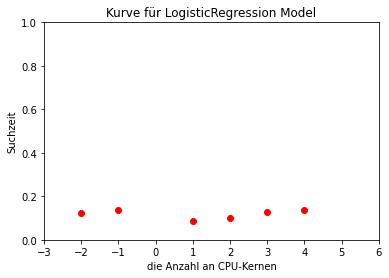

In [171]:
fig, ax = plt.subplots()
plt.title('Kurve für LogisticRegression Model')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim=(0, 1))

i = -2
for i in range(-2, 5):
    if i == 0: 
        continue
    clf2 = GridSearchCV(estimator = svm.SVC(), param_grid = {}, n_jobs = i).fit(X_train, y_train)
    results2 = pd.DataFrame(clf2.cv_results_).mean_fit_time
    ax.plot(i, results2, 'ro')
    i = i + 1

In [164]:
roc_auc_score(y_train, gridsearch_randForest.predict_proba(X_train)[:, 1])

0.9514808880227388

In [165]:
gridsearch_randForest.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 10],
  'n_estimators': [3, 200],
  'random_state': [0, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
clf3 = GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = {}, n_jobs = [-2, 5]).fit(X_train, y_train)
clf4 = GridSearchCV(estimator = GaussianNB(), param_grid = {}, n_jobs = [-2, 5]).fit(X_train, y_train)
clf5 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = {}, n_jobs = [-2, 5]).fit(X_train, y_train)
clf6 = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = {}, n_jobs = [-2, 5]).fit(X_train, y_train)
clf7 = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = {}, n_jobs = [-2, 5]).fit(X_train, y_train)